In [69]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
from collections import Counter
import warnings


import string, re,nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')


In [70]:
# NLTK additionals
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
# Reading csv file
comments_df = pd.read_csv('/content/drive/MyDrive/united airlines/Survey data _Customer comments.csv')

Text(0.5, 0, 'Number of Charecters')

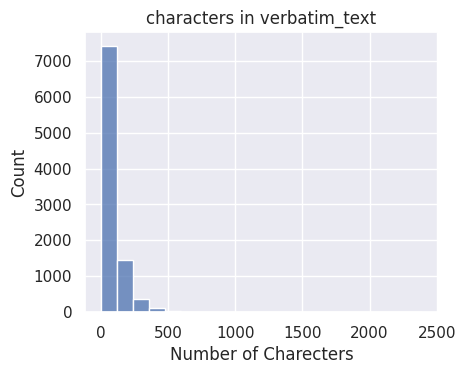

In [72]:
# Plot to see distribution of characters
data_char = comments_df['verbatim_text'].str.len()
plt.figure(figsize = (10,8))
plt.subplot(2,2, 1)
sns.histplot(x = data_char, bins = 20).set_title('characters in verbatim_text')
plt.xlabel("Number of Charecters")

In [73]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [74]:
# Converting to lower case
def to_lowercase(text):
    return text.lower()

def remove_whitespace(text):
    return text.strip()

def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return text.translate(str.maketrans("","", punct_str))

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Removing Emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text) # no emoji

# removeing special characters

def remove_special(text):
    pattern = re.compile(r"\\u00AE|\\u00a9|\\u2122")
    return pattern.sub(r'', text)

# removing ither unicode character

def remove_http(text):
    text = re.sub(r'https\S+', '', text)
    return text


def decontraction(phrase):
    hrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"&", "and", phrase)
    return phrase


def remove_escape_sequences(text):
    text=text.replace(r"\n","")
    text=text.replace(r"\t","")
    text=text.replace(r"\r","")
    return text

In [75]:
stops = stopwords.words("english")
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops
# print(allstops)

In [76]:
# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

In [77]:
# Splelling check
from textblob import TextBlob
def spellcheck(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        correct_spell = str(TextBlob(word).correct())
        word_list_corrected.append(correct_spell)

    text_corrected = " ".join(word_list_corrected)
    return text_corrected

In [78]:
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy


In [79]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [80]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    token_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS',
                 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']

    keep_words = [x[0] for x in token_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

In [81]:
def tokenise(text):
    words = word_tokenize(text)
    return words

def retokenise(word_list):
    sentence = ""
    for word in word_list:
        sentence = sentence + " " + word
    return sentence


In [82]:
def text_normalizer(text):
    text = to_lowercase(text)
    text = remove_whitespace(text)
    text = remove_punctuation(text)
    text = remove_punctuation(text)
    text = remove_emoji(text)
    text = decontraction(text)
    text = remove_stopwords(text)
    # # text = spellcheck(text)
    text = text_lemmatizer(text)
    # text = discard_non_alpha(text)
    # text = keep_pos(text)
    return text

In [83]:
# Applying text normalizaion on verbatim_text columns
comments_df['verbatim_text'] = comments_df['verbatim_text'].progress_apply(lambda x: text_normalizer(x))

  0%|          | 0/9424 [00:00<?, ?it/s]

In [84]:
# counting top words in commets_df
top = Counter([item for titles in comments_df['verbatim_text'].progress_apply(lambda x : tokenise(x)) for item in titles])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

  0%|          | 0/9424 [00:00<?, ?it/s]

,Common_words,count
0,flight,2222
1,snack,1705
2,food,1581
3,offer,1178
4,option,1155
5,meal,1103
6,good,964
7,like,752
8,serve,658
9,well,630


In [85]:
# Performing Sentiment analysis
!pip install transformers

In [86]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline

In [87]:
comments_df = comments_df.reset_index().rename(columns={'index': 'id'})

In [88]:
# A text classification model has been used from Huggingface. This particular model is used because it is fine-tuned on revies data from restaurants. Thus more suitable for our purpose.
sentiment_pipeline = pipeline(model='Ramamurthi/distilbert-base-uncased-finetuned-yelp-reviews')

In [89]:
text = ['I do not want to hate you','I love you']
# cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_pipeline(text)[0]

{'label': '1 star', 'score': 0.5252398252487183}

In [90]:
# defining fuction to get text labels and sore of each comments
def sentiment_scoring(df):
  res = {}
  for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['verbatim_text']
    id = row['id']
    res[id] = sentiment_pipeline(text)

  label = []
  score = []
  for i in range(0, len(res)):
    label.append(int(res[i][0]['label'].split()[0]))
    score.append(res[i][0]['score'])
  data = {'label':label,'sentiment_score':score}
  df= pd.DataFrame(data)

  return df

In [91]:
sentiment_df = sentiment_scoring(comments_df)


  0%|          | 0/9424 [00:00<?, ?it/s]

In [92]:
sentiment_df = sentiment_df.reset_index().rename(columns={'index':'id'})

In [93]:
sentiment_df.label.value_counts()

4    2965
3    2963
1    1995
5     765
2     736
Name: label, dtype: int64

In [94]:
comments_sentiment_df = sentiment_df.merge(comments_df, how='left', on='id')

In [95]:
comments_sentiment_df

,id,label,sentiment_score,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,0,1,0.299960,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,salad dressing staff inform flight receive sal...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,1,3,0.267756,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,choice,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,2,4,0.585596,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,variety big snack,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
3,3,1,0.506647,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,serve pretzel cookie first class extremely dis...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member
4,4,4,0.455581,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,inflight selection purchase full meal,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,9419,2,0.508898,2175,YYX,ORX,2022-09-30,Early & Ontime,Early & Ontime,Domestic,tapas box need well pita chip provide chip alw...,90+,Is there anything else you'd like to share abo...,premier gold,B737-700,Mainline,member
9420,9420,1,0.569814,680,DEX,GRX,2022-09-30,Delayed,Delayed,Domestic,flight attendant miss drink order 2x end never...,80+,Is there anything else you'd like to share abo...,global services,B737-900,Mainline,member
9421,9421,1,0.224728,1420,CLX,FLX,2022-09-29,Delayed,Early & Ontime,Domestic,mo,70+,Is there anything else you'd like to share abo...,premier platinum,B737-800,Mainline,member
9422,9422,1,0.296967,4746,LAX,EUX,2022-09-30,Early & Ontime,Early & Ontime,Domestic,without smartphone much eat pack food email fo...,80+,Is there anything else you'd like to share abo...,NaN,ERJ-175,Express,non-member


In [96]:
# Seperating different columns according to sentiment score given by model.
label1_df = comments_sentiment_df[comments_sentiment_df['label'] == 1]
label2_df = comments_sentiment_df[comments_sentiment_df['label'] == 2]
label3_df = comments_sentiment_df[comments_sentiment_df['label'] == 3]
label4_df = comments_sentiment_df[comments_sentiment_df['label'] == 4]
label5_df = comments_sentiment_df[comments_sentiment_df['label'] == 5]
# positive_df = comments_sentiment_df[comments_sentiment_df['label'] == 'positive']
# neutral_df = comments_sentiment_df[comments_sentiment_df['label'] == 'neutral']
# negative_df = comments_sentiment_df[comments_sentiment_df['label'] == 'negative']


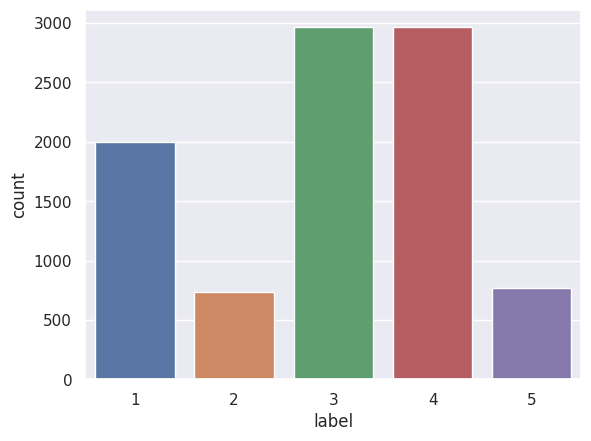

In [97]:
# Count plot for number of labels.
# label1 ---> negative
# label2 ---> little bit less negative
# label3 ---> neutral
# label4 ---> more positive
# label5 ---> positive

sns.countplot(data=comments_sentiment_df, x='label')
plt.show()

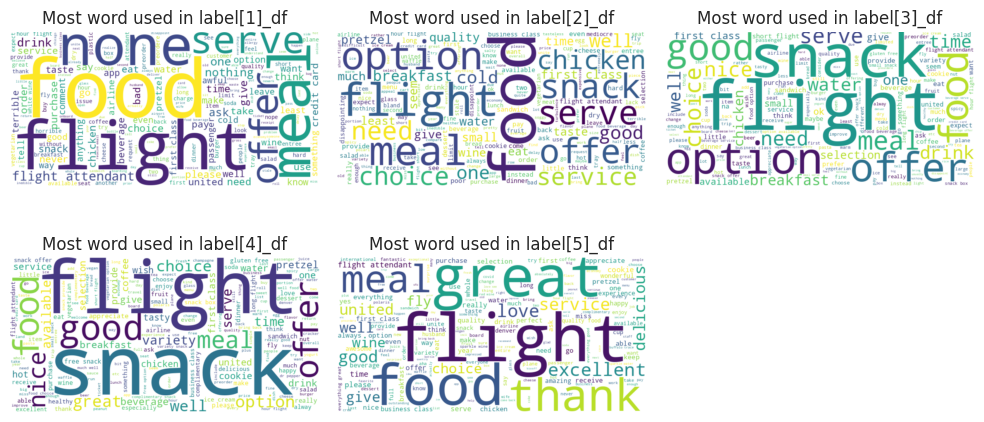

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

df_list = [label1_df, label2_df, label3_df,label4_df, label5_df]
# df_list = [positive_df,neutral_df, negative_df]

plt.figure(figsize=(10, 5))
for i in range(0, len(df_list)):
  plt.subplot(2,3,i+1)
  combined_text = ' '.join(df_list[i]['verbatim_text'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # Turn off axis labels
  plt.title(f'Most word used in label{[i+1]}_df')

plt.tight_layout()
plt.show()